In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [3]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 1024 #2048

# number of overlapping samples for the STFT operation
fft_overlap = 256

labels = ["md5", "nothing", "sha1"]

In [4]:
class_label = 0
data = getData("C:/Users/gayan/Documents/Gayan/Day5/md5Loop/m52_1.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
del data
Zxx = Zxx.transpose()
X = Zxx[0:num_samp_per_class]
y = np.full(num_samp_per_class, class_label)

for i in range(1,29):
    X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
    y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

data = getData("C:/Users/gayan/Documents/Gayan/Day5/md5Loop/m52_2.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
del data
Zxx = Zxx.transpose()
for i in range(30):
    X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
    y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

data = getData("C:/Users/gayan/Documents/Gayan/Day5/md5Loop/m52_3.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
del data
Zxx = Zxx.transpose()
for i in range(30):
    X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
    y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

C:\Users\gayan\anaconda3\envs\Research\lib\site-packages\scipy\signal\_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


In [5]:
class_label = 1
data = getData("C:/Users/gayan/Documents/Gayan/Day5/nothing/n52_1.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
del data
Zxx = Zxx.transpose()
for i in range(30):
    X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
    y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

data = getData("C:/Users/gayan/Documents/Gayan/Day5/nothing/n52_2.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
del data
Zxx = Zxx.transpose()
for i in range(30):
    X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
    y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

data = getData("C:/Users/gayan/Documents/Gayan/Day5/nothing/n52_3.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
del data
Zxx = Zxx.transpose()
for i in range(30):
    X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
    y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [6]:
class_label = 2
data = getData("C:/Users/gayan/Documents/Gayan/Day5/shaLoop/s52_1.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
del data
Zxx = Zxx.transpose()
for i in range(30):
    X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
    y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

data = getData("C:/Users/gayan/Documents/Gayan/Day5/shaLoop/s52_2.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
del data
Zxx = Zxx.transpose()
for i in range(30):
    X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
    y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

data = getData("C:/Users/gayan/Documents/Gayan/Day5/shaLoop/s52_3.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
del data
Zxx = Zxx.transpose()
for i in range(30):
    X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
    y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               820000    
                                                                 
 dense_1 (Dense)             (None, 500)               400500    
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 1,346,003
Trainable params: 1,346,003
Non-

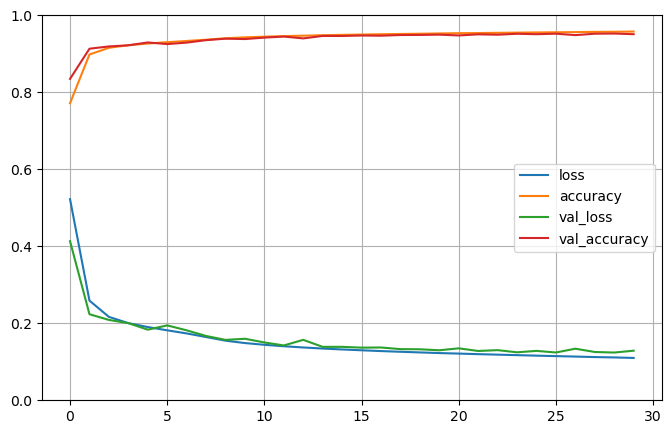

8407/8407 [==============================] - 19s 2ms/step - loss: 0.1297 - accuracy: 0.9503
test loss, test acc: [0.1297360509634018, 0.9503494501113892]
8407/8407 [==============================] - 14s 2ms/step
[1 2 1 ... 0 2 0]
1
[[87552   156  1250]
 [  260 86145  3687]
 [ 2695  5308 81947]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     88958
           1       0.94      0.96      0.95     90092
           2       0.94      0.91      0.93     89950

    accuracy                           0.95    269000
   macro avg       0.95      0.95      0.95    269000
weighted avg       0.95      0.95      0.95    269000



In [7]:
X = abs(X)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(X)
#print(scaler.data_max_)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))

model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))
model.summary()

opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model_d5_52.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])
model.save("./model_d5_52.h5") 

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

model = keras.models.load_model("./model_d5_52.h5")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)
#y_pred = model.predict(X_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

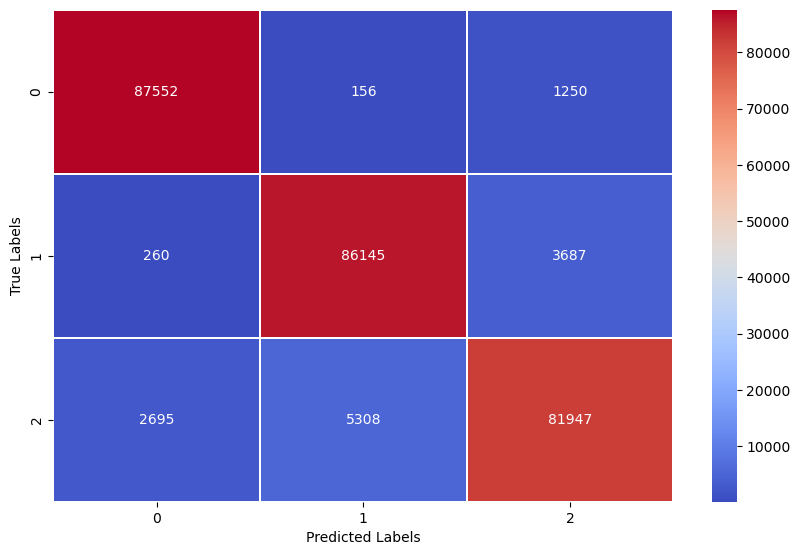

<Figure size 640x480 with 0 Axes>

In [8]:
f, ax = plt.subplots(figsize=(10, 6))
hm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, cmap="coolwarm",fmt='.0f',linewidths=.05)
f.subplots_adjust(top=0.93)

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()
plt.savefig('hash_confusion_matrix.pdf', format='pdf', bbox_inches='tight')